<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito+Sans&family=Quicksand&display=swap" rel="stylesheet">

<div display="flex" align="center" justify-content="center" width="100%">

<!-- <img height=80 src="https://drive.google.com/uc?id=13kMLUyF9yPOsfMB782I1wk-_pYNiyxkI"> </img> -->
</div>

<div style="font-family: 'Nunito Sans', sans-serif;">
    
# **Classification**
---
    
</div> 

<div  style="font-size: 22px; color:black; font-family: 'Quicksand', sans-serif;font-weight:500">

Author : Thivin Anandh D 


</div>


<div  style="font-size: 18px; color:black; font-family: 'Quicksand', sans-serif;font-weight:400">
<a href="https://www.linkedin.com/in/thivinanandh/" > Linkedin 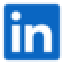</a>
<a href="https://github.com/thivinanandh" > Github 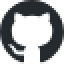</a>

For opening this notebook in google colab, please click on the button below.<br />
<br />
<a href="https://colab.research.google.com/github/thivinanandh/Teaching-Python/blob/main/ML-Algorithms/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

</div>


In [15]:
!python3 -m pip install numpy pandas matplotlib scikit-learn xgboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.1 MB 4.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


# Introduction to Classification

## What is Classification?

Classification is a supervised learning technique in machine learning where the goal is to predict the categorical class labels of new instances, based on past observations. Given an input variable (X), the algorithm tries to predict the output class (Y) from a set of predefined categories.

## Types of Classification

### 1. Binary Classification

Binary classification involves categorizing instances into one of two classes. It's the simplest form of classification.

Examples:
- Spam detection (Spam / Not Spam)
- Medical diagnosis (Disease present / Disease absent)
- Customer churn prediction (Will churn / Will not churn)

### 2. Multi-class Classification

Multi-class classification involves categorizing instances into one of three or more classes. Each instance belongs to exactly one class.

Examples:
- Handwritten digit recognition (0-9)
- Plant species classification
- Sentiment analysis (Positive / Neutral / Negative)

### 3. Multi-label Classification

In multi-label classification, each instance can belong to multiple classes simultaneously.

Examples:
- Image tagging (An image can have multiple tags like "beach", "sunset", "people")
- Document categorization (A document can belong to multiple categories)

## Classification Algorithms

This notebook will cover the following classification algorithms:

1. Logistic Regression
2. Support Vector Machines (SVM)
3. Decision Trees
4. Random Forest
5. Gradient Boosting Machines
6. K-Nearest Neighbors (KNN)
7. Naive Bayes

We'll also explore ensemble methods like Voting Classifiers and Stacking.

For each algorithm, we'll focus on:
- Implementation
- Hyperparameter tuning
- Interpretation of results
- Strengths and weaknesses

Let's dive into each algorithm and see how they can be applied to solve classification problems!

# Logistic Regression

Logistic Regression is a fundamental classification algorithm, particularly useful for binary classification problems. Despite its name, it's used for classification, not regression.

## Basic Concept

Logistic Regression models the probability that an instance belongs to a particular class. The model calculates the log-odds of the probability and uses the logistic function to transform it into a probability between 0 and 1.

## Implementation

Here's a basic implementation using scikit-learn:

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assume X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
```
#### Hyperparameter Tuning
Key hyperparameters for Logistic Regression include:

C: Inverse of regularization strength
penalty: Type of regularization ('l1', 'l2', 'elasticnet', 'none')
solver: Algorithm for optimization problem

Here's an example of hyperparameter tuning using GridSearchCV:

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
```

### Interpreting Coefficients
Logistic Regression coefficients represent the change in the log-odds of the outcome for a one-unit increase in the predictor variable.

```python
# Assuming binary classification
feature_names = X.columns  # If X is a DataFrame
coefficients = model.coef_[0]

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")
```

Positive coefficients increase the probability of the positive class, while negative coefficients decrease it. The magnitude of the coefficient indicates its importance.
Pros and Cons
#### Pros:

Simple and interpretable
Works well for linearly separable classes
Provides probability scores

#### Cons:

- Assumes linear relationship between features and log-odds
- May underperform with non-linear relationships
- Can struggle with imbalanced datasets

Logistic Regression is often a good starting point for binary classification problems due to its simplicity and interpretability

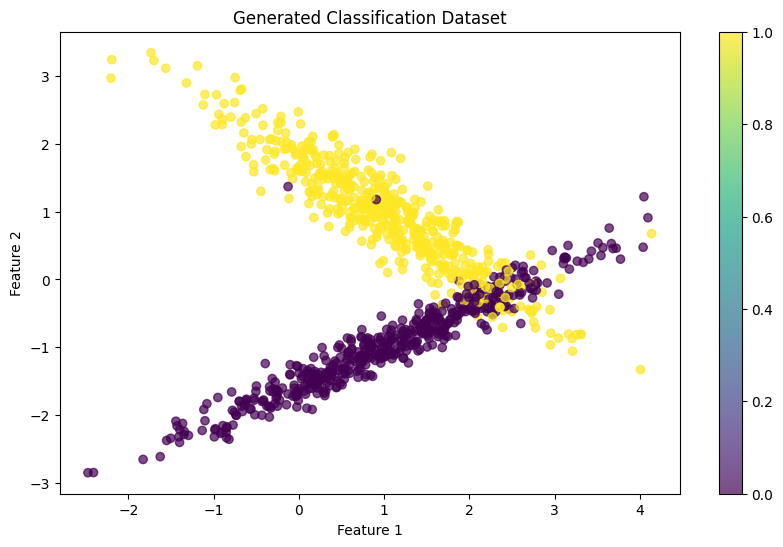

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
Best cross-validation score: 0.9049999999999999
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def generate_custom_dataset(n_samples=1000, n_features=2, n_classes=2):
    """
    Generate a custom dataset for classification using sklearn's make_classification.

    Parameters:
    -----------
    n_samples : int, optional (default=1000)
        The number of samples to generate.
    n_features : int, optional (default=2)
        The number of features to generate. Keep at 2 for easy visualization.
    n_classes : int, optional (default=2)
        The number of classes (or labels) to generate.

    Returns:
    --------
    X : array of shape (n_samples, n_features)
        The generated samples.
    y : array of shape (n_samples,)
        The integer labels for class membership of each sample.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def visualize_dataset(X, y):
    """
    Visualize the generated dataset.

    Parameters:
    -----------
    X : array of shape (n_samples, n_features)
        The input samples.
    y : array of shape (n_samples,)
        The target values.
    """
    plt.figure(figsize=(10, 6))
    
    # Create a scatter plot
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Generated Classification Dataset')
    
    # Add a color bar
    plt.colorbar(scatter)
    
    plt.show()

def create_logistic_regression_pipeline():
    """
    Create a pipeline for logistic regression with standardization.

    This pipeline ensures that the data is standardized before
    being fed into the logistic regression model.

    Returns:
    --------
    sklearn.pipeline.Pipeline
        A scikit-learn pipeline with StandardScaler and LogisticRegression.
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])

def perform_grid_search(pipeline, X_train, y_train):
    """
    Perform grid search to find the best hyperparameters for logistic regression.

    Parameters:
    -----------
    pipeline : sklearn.pipeline.Pipeline
        The logistic regression pipeline.
    X_train : array-like of shape (n_samples, n_features)
        The training input samples.
    y_train : array-like of shape (n_samples,)
        The target values for training.

    Returns:
    --------
    sklearn.model_selection.GridSearchCV
        A fitted GridSearchCV object.
    """
    # Define the hyperparameter grid to search
    param_grid = {
        # 'C' is the inverse of regularization strength
        # Smaller values specify stronger regularization
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        
        # 'penalty' specifies the norm used in the penalization
        # 'l2' is the default, which is ridge regression (sum of squares)
        # Note: 'l1' (Lasso) is not included as it's not supported by all solvers
        'classifier__penalty': ['l2'],
        
        # 'solver' specifies the algorithm to use in the optimization problem
        # 'newton-cg': for multinomial loss and L2 penalty
        # 'lbfgs': handles L2 penalty
        # 'sag': for large datasets
        'classifier__solver': ['newton-cg', 'lbfgs', 'sag']
    }

    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        estimator=pipeline,  # The pipeline to perform grid search on
        param_grid=param_grid,  # The hyperparameter grid
        cv=5,  # Number of cross-validation folds
        n_jobs=-1,  # Use all available cores for parallel processing
        verbose=1  # Verbosity level (0: no output, 1: some output, 2: detailed output)
    )

    # Fit the grid search to the data
    # This will train the model with all combinations of hyperparameters
    # and select the best one based on cross-validation performance
    grid_search.fit(X_train, y_train)

    return grid_search

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print classification metrics.

    Parameters:
    -----------
    model : estimator object
        The fitted model to evaluate.
    X_test : array-like of shape (n_samples, n_features)
        The testing input samples.
    y_test : array-like of shape (n_samples,)
        The target values for testing.
    """
    # Use the model to make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and print the accuracy score
    # Accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Print a detailed classification report
    # This report includes precision, recall, f1-score, and support for each class
    # Precision: The ability of the classifier not to label as positive a sample that is negative
    # Recall: The ability of the classifier to find all the positive samples
    # F1-score: The harmonic mean of precision and recall
    # Support: The number of occurrences of each class in y_test
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

def visualize_decision_boundary(X, y, model):
    """
    Visualize the decision boundary of the logistic regression model.

    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input samples.
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model.
    """
    # Create a new figure with specified size
    plt.figure(figsize=(10, 6))

    # Create a mesh grid to plot the decision boundary
    # We extend the grid slightly beyond the data points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid points
    # We first flatten the grid to a 2D array, make predictions, then reshape back to the original grid shape
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    # The contourf function is used to create filled contours
    # alpha=0.4 makes the contour fill slightly transparent
    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plot the original data points
    # c=y colors the points according to their class
    # cmap='viridis' specifies the colormap to use
    # alpha=0.7 makes the points slightly transparent
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)

    # Label the axes and set the title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    
    # Add a color bar to show the mapping of colors to class labels
    plt.colorbar(scatter)
    
    # Display the plot
    plt.show()


if __name__ == "__main__":
    # Generate custom dataset
    X, y = generate_custom_dataset()

    # Visualize the dataset
    visualize_dataset(X, y)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the logistic regression pipeline
    pipeline = create_logistic_regression_pipeline()

    # Perform grid search
    grid_search = perform_grid_search(pipeline, X_train, y_train)

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Here grid_search.best_estimator_ is the best model that was found by the grid search
    best_model = grid_search.best_estimator_

    # Evaluate the model
    evaluate_model(grid_search.best_estimator_, X_test, y_test)


# About decision boundary
---

Decision boundary is a line that separates the data points of different classes. It is a boundary between two regions of different classes in a classification problem.

In a binary classification problem, the decision boundary is a line that separates the data points of two classes. This line is often a straight line, but it can also be a curve or a more complex surface depending on the complexity of the data and the algorithm used.

For example, in a 2D space with two features, the decision boundary might be a straight line, while in a 3D space with three features, it might be a plane, and in higher dimensions, it could be a hyperplane.

The decision boundary is determined by the model's parameters, which are learned during the training process. The goal of the model is to find the best boundary that separates the data points of different classes.


### Visualization of Decision Boundary

To visualize the decision boundary, we can use the following logic. It involves creating a mesh grid of points and then making predictions on those points. The predictions are then used to create a decision boundary. The code 


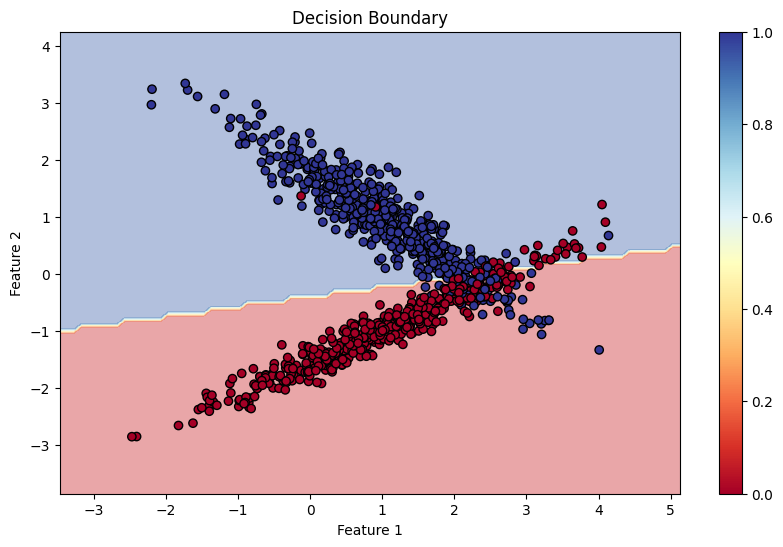

In [6]:
def plot_decision_boundary(X, y, model, ax=None):
    """
    Plot the decision boundary for a trained model.

    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The input samples (must be 2D for visualization).
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model with a predict method.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot. If None, a new figure and axes will be created.

    Returns:
    --------
    matplotlib.axes.Axes
        The axes containing the plot.
    """
    # Create axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Plot the original data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')

    # Set labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary')

    # Add a colorbar
    plt.colorbar(scatter, ax=ax)

    return ax

# Assuming you have already:
# 1. Generated your dataset: X, y = generate_custom_dataset()
# 2. Split your data: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Created and trained your model (let's call it 'best_model')

# Now you can plot the decision boundary
plot_decision_boundary(X, y, best_model)
plt.show()

# Support Vector Machines (SVM)
---

Support Vector Machines (SVM) are powerful and versatile machine learning models used for both classification and regression tasks. They are particularly effective in high-dimensional spaces and are memory-efficient due to their use of a subset of training points in the decision function (called support vectors).

## Core Concept

The main idea behind SVM is to find a hyperplane that best divides a dataset into classes. For binary classification:

1. SVM tries to find the hyperplane that maximizes the margin between the two classes.
2. The margin is defined as the distance between the hyperplane and the nearest data point from either class.
3. The data points nearest to the hyperplane are called support vectors.

## Mathematical Formulation

For a binary classification problem with training data {(x₁, y₁), ..., (xₙ, yₙ)}, where xᵢ ∈ ℝᵈ and yᵢ ∈ {-1, 1}, the SVM optimization problem can be formulated as:

$$
\begin{aligned}
\text{minimize}  & \quad \frac{1}{2}||w||^2 + C \sum_i \xi_i \\
\text{subject to} & \quad y_i(w \cdot x_i + b) \geq 1 - \xi_i  \quad \text{and} \quad \xi_i \geq 0 \quad \text{for all } i
\end{aligned}
$$

Where:
- w is the normal vector to the hyperplane
- b is the bias term
- ξᵢ are slack variables that allow for misclassification
- C is the regularization parameter

## Key Hyperparameters in Scikit-learn

1. **C** (float, default=1.0):
   - Regularization parameter. The strength of the regularization is inversely proportional to C.
   - Smaller values specify stronger regularization.

2. **kernel** (string, default='rbf'):
   - Specifies the kernel type to be used in the algorithm.
   - Options: 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
   - 'rbf' (Radial Basis Function) is generally a good default.

3. **degree** (int, default=3):
   - Degree of the polynomial kernel function.
   - Ignored by all other kernels.

4. **gamma** (float, default='scale'):
   - Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
   - If gamma='scale' (default), it uses 1 / (n_features * X.var()) as value of gamma.
   - If gamma='auto', it uses 1 / n_features.

5. **class_weight** (dict or 'balanced', default=None):
   - Set the parameter C of class i to class_weight[i]*C for SVC.
   - If 'balanced', class weights are automatically adjusted inversely proportional to class frequencies.

## Pros and Cons

### Pros:
1. Effective in high-dimensional spaces.
2. Still effective when the number of dimensions is greater than the number of samples.
3. Memory efficient, as it uses a subset of training points (support vectors) in the decision function.
4. Versatile: different Kernel functions can be specified for the decision function.

### Cons:
1. If the number of features is much greater than the number of samples, avoiding over-fitting requires careful choice of kernel functions and regularization term.
2. SVMs do not directly provide probability estimates; these are calculated using an expensive five-fold cross-validation.
3. Can be sensitive to feature scaling.
4. Computationally expensive for large datasets.

SVMs remain a powerful tool in machine learning, particularly effective for complex but small or medium-sized datasets.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'classifier__C': 100, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.9487499999999999
Accuracy: 0.935

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       104
           1       0.96      0.91      0.93        96

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



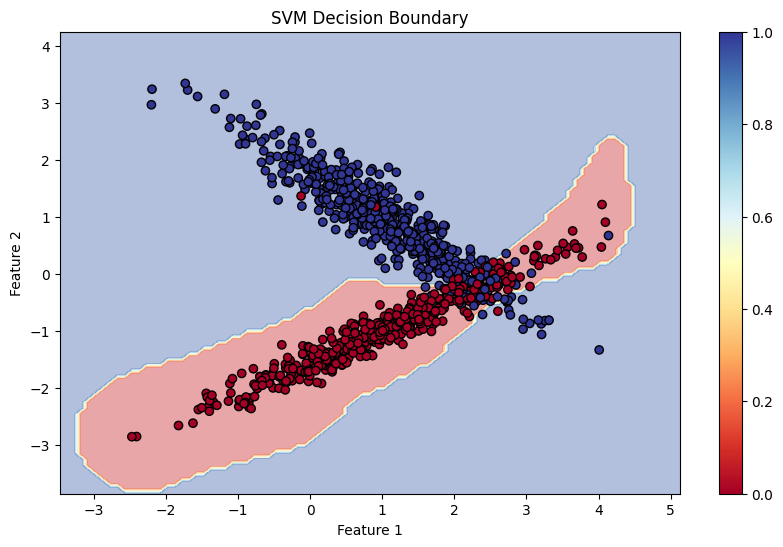

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

def generate_dataset(n_samples=1000, n_features=2, n_classes=2):
    """
    Generate a custom dataset for classification.

    Parameters:
    -----------
    n_samples : int, optional (default=1000)
        The number of samples to generate.
    n_features : int, optional (default=2)
        The number of features to generate. Keep at 2 for easy visualization.
    n_classes : int, optional (default=2)
        The number of classes (or labels) to generate.

    Returns:
    --------
    X : array of shape (n_samples, n_features)
        The generated samples.
    y : array of shape (n_samples,)
        The integer labels for class membership of each sample.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def create_svm_pipeline():
    """
    Create a pipeline for SVM with standardization.

    This pipeline ensures that the data is standardized before
    being fed into the SVM model, which is crucial for SVM performance.

    Returns:
    --------
    sklearn.pipeline.Pipeline
        A scikit-learn pipeline with StandardScaler and SVC.
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ])

def perform_grid_search(pipeline, X_train, y_train):
    """
    Perform grid search to find the best hyperparameters for SVM.

    Parameters:
    -----------
    pipeline : sklearn.pipeline.Pipeline
        The SVM pipeline.
    X_train : array-like of shape (n_samples, n_features)
        The training input samples.
    y_train : array-like of shape (n_samples,)
        The target values for training.

    Returns:
    --------
    sklearn.model_selection.GridSearchCV
        A fitted GridSearchCV object.
    """
    # Define the hyperparameter grid to search
    param_grid = {
        # 'C' is the regularization parameter
        # Smaller values specify stronger regularization
        'classifier__C': [0.1, 1, 10, 100],
        
        # 'kernel' specifies the kernel type to be used in the algorithm
        # 'linear': linear kernel
        # 'rbf': Radial Basis Function kernel
        # 'poly': Polynomial kernel
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        
        # 'gamma' is the kernel coefficient for 'rbf' and 'poly'
        # 'scale' uses 1 / (n_features * X.var()) as value of gamma
        # 'auto' uses 1 / n_features
        'classifier__gamma': ['scale', 'auto'],
        
        # 'degree' is the degree of the polynomial kernel function
        # Only significant for poly kernel
        'classifier__degree': [2, 3, 4]
    }

    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        n_jobs=-1,  # Use all available cores
        verbose=1
    )

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    return grid_search

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print classification metrics.

    Parameters:
    -----------
    model : estimator object
        The fitted model to evaluate.
    X_test : array-like of shape (n_samples, n_features)
        The testing input samples.
    y_test : array-like of shape (n_samples,)
        The target values for testing.
    """
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(X, y, model, ax=None):
    """
    Plot the decision boundary for a trained model.

    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The input samples (must be 2D for visualization).
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model with a predict method.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot. If None, a new figure and axes will be created.

    Returns:
    --------
    matplotlib.axes.Axes
        The axes containing the plot.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Plot the original data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('SVM Decision Boundary')

    plt.colorbar(scatter, ax=ax)

    return ax

if __name__ == "__main__":
    # Generate custom dataset
    X, y = generate_dataset()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the SVM pipeline
    pipeline = create_svm_pipeline()

    # Perform grid search
    grid_search = perform_grid_search(pipeline, X_train, y_train)

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the model
    evaluate_model(best_model, X_test, y_test)

    # Plot the decision boundary
    plot_decision_boundary(X, y, best_model)
    plt.show()

# Note: This script will take some time to run due to the extensive grid search.
# The output will show the progress of the grid search, the best parameters found,
# and the performance metrics of the best model on the test set.

# Decision Trees
---

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks. They work by creating a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

## How Decision Trees Work

1. The algorithm starts at the root of the tree and splits the data on the feature that results in the largest Information Gain (IG).
2. The process then recursively splits on the remaining features at each child node.
3. The splitting stops when a stopping criterion is met (e.g., maximum depth reached, minimum samples for a split, etc.).

## Important Hyperparameters in Scikit-learn

### 1. criterion
- **Purpose**: The function used to measure the quality of a split.
- **Options**: 
  - For classification: 'gini' for Gini impurity, 'entropy' for information gain.
  - For regression: 'squared_error', 'friedman_mse', 'absolute_error', 'poisson'.
- **Default**: 'gini' for classification, 'squared_error' for regression.
- **Impact**: Affects how the tree decides to split nodes.

### 2. max_depth
- **Purpose**: The maximum depth of the tree.
- **Default**: None (nodes expanded until all leaves are pure or contain less than min_samples_split samples).
- **Impact**: Controls the complexity of the tree. Smaller values prevent overfitting but might underfit.

### 3. min_samples_split
- **Purpose**: The minimum number of samples required to split an internal node.
- **Default**: 2
- **Impact**: Higher values prevent creating too many nodes with few samples, reducing overfitting.

### 4. min_samples_leaf
- **Purpose**: The minimum number of samples required to be at a leaf node.
- **Default**: 1
- **Impact**: Ensures each leaf has at least this many samples, smoothing the model and preventing overfitting.

### 5. max_features
- **Purpose**: The number of features to consider when looking for the best split.
- **Options**: int, float, {'auto', 'sqrt', 'log2'}, or None.
- **Default**: None (all features).
- **Impact**: Reduces overfitting by considering only a subset of features at each split.

### 6. random_state
- **Purpose**: Controls the randomness of the estimator.
- **Default**: None
- **Impact**: Ensures reproducibility when set to a fixed value.

### 7. class_weight
- **Purpose**: Weights associated with classes (for classification only).
- **Options**: dict, 'balanced', or None.
- **Default**: None
- **Impact**: Adjusts for imbalanced datasets by scaling the importance of classes.

### 8. ccp_alpha
- **Purpose**: Complexity parameter for Minimal Cost-Complexity Pruning.
- **Default**: 0.0 (no pruning)
- **Impact**: Higher values lead to more pruning, simplifying the tree and potentially reducing overfitting.

## Pros and Cons of Decision Trees

### Pros:
1. **Interpretability**: Easy to understand and visualize.
2. **No preprocessing required**: Can handle numerical and categorical data without scaling or normalization.
3. **Handles non-linear relationships**: Can capture complex patterns in data.
4. **Feature importance**: Provides a clear view of which features are most important for predictions.
5. **Handles missing values**: Can work with datasets containing missing values.

### Cons:
1. **Overfitting**: Prone to creating overly complex trees that don't generalize well, especially with deep trees.
2. **Instability**: Small variations in the data can result in a completely different tree.
3. **Biased with imbalanced datasets**: Tends to favor majority classes.
4. **Suboptimal**: Greedy algorithm doesn't guarantee to return the globally optimal decision tree.
5. **Difficulty with diagonal decision boundaries**: Struggles with XOR-like problems.

Decision Trees are powerful and interpretable models, but they require careful tuning to prevent overfitting. Understanding and properly setting hyperparameters is crucial for building effective Decision Tree models. Often, ensemble methods like Random Forests or Gradient Boosting Trees are used to overcome some of the limitations of individual Decision Trees.

Starting grid search...
Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/Users/admin/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Best cross-validation score: 0.9337500000000001

Evaluating best model on test set:
Accuracy: 0.895

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       104
           1       0.89      0.89      0.89        96

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200


Plotting decision boundary...


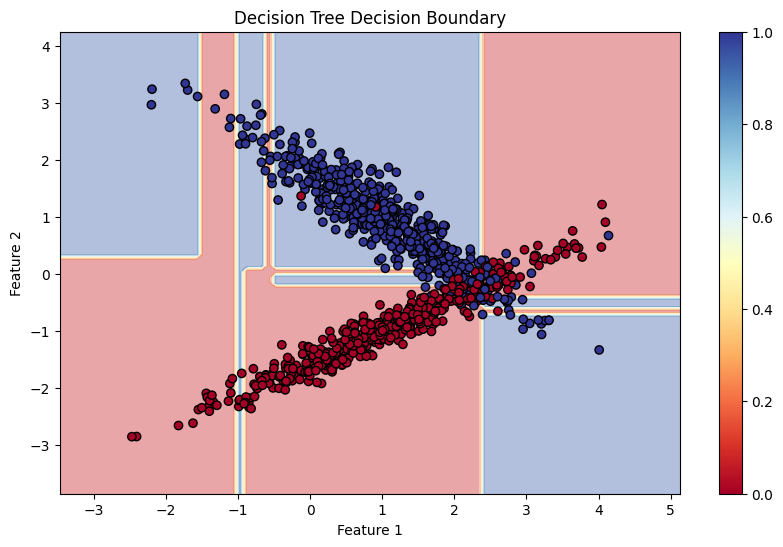


Plotting tree structure...


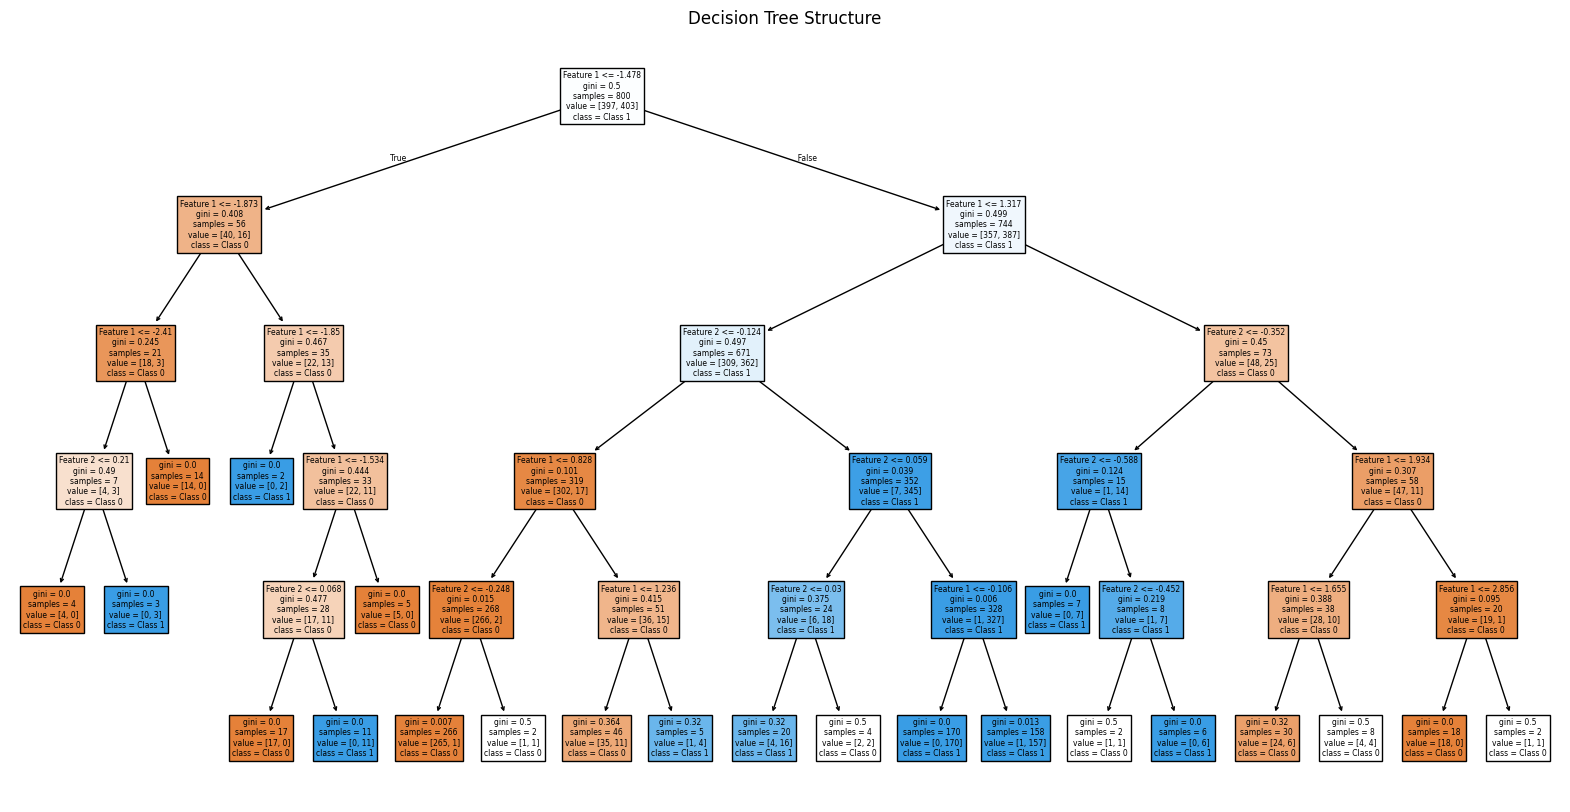


Analysis complete!


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

def generate_dataset(n_samples=1000, n_features=2, n_classes=2):
    """Generate a custom dataset for classification."""
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def create_decision_tree_pipeline():
    """Create a pipeline for Decision Tree with standardization."""
    return Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('classifier', DecisionTreeClassifier())  # Decision Tree classifier
    ])

def perform_grid_search(pipeline, X_train, y_train):
    """Perform grid search to find the best hyperparameters for Decision Tree."""
    # Define the hyperparameter grid to search
    param_grid = {
        'classifier__criterion': ['gini', 'entropy'],  # Measure of the quality of a split
        'classifier__max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
        'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
        'classifier__min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
        'classifier__max_features': ['sqrt', 'log2', None]  # Number of features to consider for best split
    }

    # Create and fit GridSearchCV object
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        n_jobs=-1,  # Use all available cores
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    return grid_search

def evaluate_model(model, X_test, y_test):
    """Evaluate the model and print classification metrics."""
    # Make predictions on test set
    y_pred = model.predict(X_test)
    
    # Calculate and print accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Print detailed classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(X, y, model, ax=None):
    """Plot the decision boundary for a trained model."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Plot the original data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')

    # Set labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Tree Decision Boundary')

    # Add a colorbar
    plt.colorbar(scatter, ax=ax)

    return ax

def plot_tree_structure(model):
    """Plot the structure of the decision tree."""
    plt.figure(figsize=(20,10))
    plot_tree(model, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
    plt.title("Decision Tree Structure")
    plt.show()

if __name__ == "__main__":
    # Generate custom dataset
    X, y = generate_dataset()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the Decision Tree pipeline
    pipeline = create_decision_tree_pipeline()

    # Perform grid search to find best hyperparameters
    print("Starting grid search...")
    grid_search = perform_grid_search(pipeline, X_train, y_train)

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    print("\nEvaluating best model on test set:")
    evaluate_model(best_model, X_test, y_test)

    # Plot the decision boundary
    print("\nPlotting decision boundary...")
    plot_decision_boundary(X, y, best_model)
    plt.show()

    # Plot the tree structure
    print("\nPlotting tree structure...")
    plot_tree_structure(best_model.named_steps['classifier'])

    print("\nAnalysis complete!")

# Note: This script will take some time to run due to the extensive grid search.
# The output will show the progress of the grid search, the best parameters found,
# and the performance metrics of the best model on the test set.

# Random Forests
---

Random Forests are an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

## How Random Forests Work

1. Random Forests create multiple decision trees on randomly selected data samples.
2. It gets the prediction from each tree and votes for the best solution.
3. It is better than a single decision tree because it reduces the risk of overfitting by averaging the results.

## Important Hyperparameters in Scikit-learn

### 1. n_estimators
- **Purpose**: The number of trees in the forest.
- **Default**: 100
- **Impact**: More trees generally increase performance and make predictions more stable, but also increase computation time.

### 2. criterion
- **Purpose**: The function used to measure the quality of a split.
- **Options**: 
  - For classification: 'gini' for Gini impurity, 'entropy' for information gain.
  - For regression: 'squared_error', 'absolute_error', 'poisson'.
- **Default**: 'gini' for classification, 'squared_error' for regression.
- **Impact**: Affects how the trees in the forest decide to split nodes.

### 3. max_depth
- **Purpose**: The maximum depth of the trees.
- **Default**: None (nodes are expanded until all leaves are pure or contain less than min_samples_split samples).
- **Impact**: Controls the complexity of the trees. Smaller values prevent overfitting but might underfit.

### 4. min_samples_split
- **Purpose**: The minimum number of samples required to split an internal node.
- **Default**: 2
- **Impact**: Higher values prevent creating too many nodes with few samples, reducing overfitting.

### 5. min_samples_leaf
- **Purpose**: The minimum number of samples required to be at a leaf node.
- **Default**: 1
- **Impact**: Ensures each leaf has at least this many samples, smoothing the model and preventing overfitting.

### 6. max_features
- **Purpose**: The number of features to consider when looking for the best split.
- **Options**: 'sqrt', 'log2', int, float, or None.
- **Default**: 'sqrt' for classification, 1.0 for regression.
- **Impact**: Reduces overfitting by considering only a subset of features at each split, also introduces more randomness.

### 7. bootstrap
- **Purpose**: Whether bootstrap samples are used when building trees.
- **Default**: True
- **Impact**: If False, the whole dataset is used to build each tree.

### 8. oob_score
- **Purpose**: Whether to use out-of-bag samples to estimate the generalization accuracy.
- **Default**: False
- **Impact**: Provides an unbiased estimate of the model's performance without needing a separate test set.

### 9. random_state
- **Purpose**: Controls the randomness of the estimator.
- **Default**: None
- **Impact**: Ensures reproducibility when set to a fixed value.

### 10. class_weight
- **Purpose**: Weights associated with classes (for classification only).
- **Options**: dict, 'balanced', 'balanced_subsample', or None.
- **Default**: None
- **Impact**: Adjusts for imbalanced datasets by scaling the importance of classes.

## Pros and Cons of Random Forests

### Pros:
1. **Reduced Overfitting**: By averaging multiple decision trees, Random Forests reduce the risk of overfitting.
2. **High Accuracy**: Generally yield high accuracy compared to other algorithms.
3. **Feature Importance**: Provide a measure of feature importance, helping in feature selection.
4. **Handles Non-linear Relationships**: Can capture complex patterns in data.
5. **Robust to Outliers**: Less sensitive to outliers in the data.
6. **Parallelization**: Can be easily parallelized, making them efficient for large datasets.

### Cons:
1. **Black Box Nature**: Less interpretable than a single decision tree.
2. **Computationally Intensive**: Training many deep trees can be computationally expensive and time-consuming.
3. **Memory Intensive**: Require more memory to store multiple trees.
4. **Bias Towards Categorical Variables**: Can be biased towards features with more levels in classification tasks.
5. **Slower Predictions**: Making predictions can be slower than with simple models, especially with many trees.

## Conclusion

Random Forests are powerful and versatile models that often perform very well out-of-the-box. They are less prone to overfitting compared to individual decision trees and provide a good balance between interpretability and performance. However, they require more computational resources and can be slower in making predictions compared to simpler models. Proper tuning of hyperparameters, especially `n_estimators`, `max_depth`, and `max_features`, is crucial for optimal performance.

Generating dataset...
Splitting dataset into train and test sets...
Starting grid search...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation score: 0.93875

Evaluating best model on test set:
Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       104
           1       0.92      0.94      0.93        96

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


Plotting decision boundary...


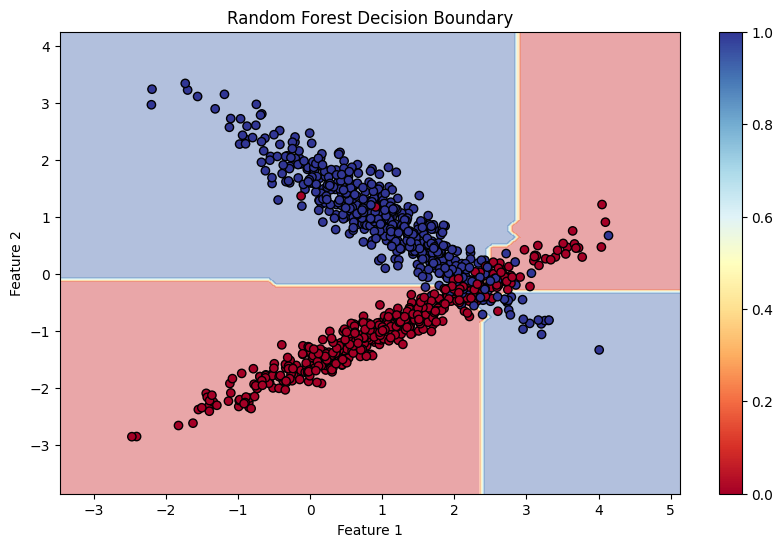


Plotting feature importance...


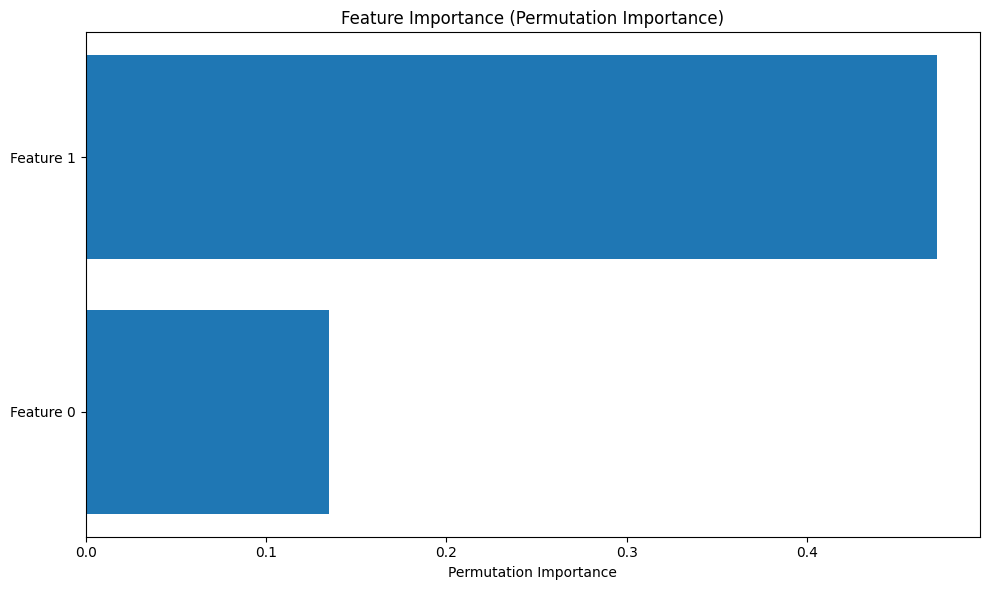


Analysis complete!


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance

def generate_dataset(n_samples=1000, n_features=2, n_classes=2):
    """Generate a custom dataset for classification."""
    # We use make_classification to create a synthetic dataset
    # This is useful for testing and demonstrating machine learning algorithms
    X, y = make_classification(
        n_samples=n_samples,    # Total number of samples
        n_features=n_features,  # Number of features (set to 2 for easy visualization)
        n_informative=2,        # Number of informative features
        n_redundant=0,          # No redundant features
        n_classes=n_classes,    # Number of classes (binary classification by default)
        n_clusters_per_class=1, # Each class has one cluster
        random_state=42         # For reproducibility
    )
    return X, y

def create_random_forest_pipeline():
    """Create a pipeline for Random Forest with standardization."""
    # We use a pipeline to ensure that data preprocessing steps are applied
    # consistently to both training and test data
    return Pipeline([
        ('scaler', StandardScaler()),  # Step 1: Standardize features
        ('classifier', RandomForestClassifier())  # Step 2: Random Forest classifier
    ])

def perform_grid_search(pipeline, X_train, y_train):
    """Perform grid search to find the best hyperparameters for Random Forest."""
    # Define the hyperparameter grid to search
    # These are some of the most important hyperparameters for Random Forest
    param_grid = {
        'classifier__n_estimators': [100, 200],     # Number of trees in the forest
        'classifier__max_depth': [None, 10, 20],    # Maximum depth of trees (None means unlimited)
        'classifier__min_samples_split': [2, 5],    # Minimum samples required to split an internal node
        'classifier__min_samples_leaf': [1, 2],     # Minimum samples required to be at a leaf node
        'classifier__max_features': ['sqrt', 'log2'],  # Number of features to consider for best split
        'classifier__bootstrap': [True, False],     # Whether to use bootstrap samples
    }

    # Create and fit GridSearchCV object
    # This will perform an exhaustive search over the specified parameter values
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,        # 5-fold cross-validation
        n_jobs=-1,   # Use all available CPU cores
        verbose=1    # Print progress
    )
    grid_search.fit(X_train, y_train)

    return grid_search

def evaluate_model(model, X_test, y_test):
    """Evaluate the model and print classification metrics."""
    # Make predictions on test set
    y_pred = model.predict(X_test)
    
    # Calculate and print accuracy
    # Accuracy is the ratio of correct predictions to total predictions
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Print detailed classification report
    # This includes precision, recall, f1-score for each class
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(X, y, model, ax=None):
    """Plot the decision boundary for a trained model."""
    # If no axes object is provided, create a new figure
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create a mesh grid to visualize the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    # The contourf function is used to create filled contour plots
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Plot the original data points
    # Each point is colored according to its true class
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')

    # Set labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Random Forest Decision Boundary')

    # Add a colorbar to show the mapping of colors to classes
    plt.colorbar(scatter, ax=ax)

    return ax

def plot_feature_importance(model, X, y):
    """Plot feature importance using permutation importance."""
    # Calculate permutation importance
    # This method randomly shuffles each feature and measures the decrease in model performance
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

    # Sort features by importance
    feature_importance = perm_importance.importances_mean
    sorted_idx = feature_importance.argsort()

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
    plt.yticks(range(X.shape[1]), [f'Feature {i}' for i in sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title('Feature Importance (Permutation Importance)')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Generate custom dataset
    print("Generating dataset...")
    X, y = generate_dataset()

    # Split the data into training and testing sets
    # This is crucial to assess the model's performance on unseen data
    print("Splitting dataset into train and test sets...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the Random Forest pipeline
    pipeline = create_random_forest_pipeline()

    # Perform grid search to find best hyperparameters
    # This can be time-consuming but helps in finding the optimal model configuration
    print("Starting grid search...")
    grid_search = perform_grid_search(pipeline, X_train, y_train)
    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    # This gives us an unbiased estimate of the model's performance
    print("\nEvaluating best model on test set:")
    evaluate_model(best_model, X_test, y_test)

    # Plot the decision boundary
    # This helps visualize how the model is separating the classes
    print("\nPlotting decision boundary...")
    plot_decision_boundary(X, y, best_model)
    plt.show()

    # Plot feature importance
    # This helps understand which features are most influential in the model's decisions
    print("\nPlotting feature importance...")
    plot_feature_importance(best_model, X, y)

    print("\nAnalysis complete!")

# Gradient Boosting: XGBoost
---

XGBoost (eXtreme Gradient Boosting) is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework, providing a parallel tree boosting that solves many data science problems in a fast and accurate way.

## How XGBoost Works

1. XGBoost builds trees sequentially, with each new tree correcting the errors of the previous ensemble.
2. It uses a more regularized model formalization to control overfitting, which gives it better performance.
3. XGBoost employs advanced techniques like handling sparse data, parallel processing, and tree pruning.

## Important Hyperparameters in XGBoost

### 1. learning_rate (eta)
- **Purpose**: Step size shrinkage used in update to prevent overfitting.
- **Default**: 0.3
- **Typical Range**: 0.01-0.3
- **Impact**: Lower values make the model more robust to overfitting but slower to compute.

### 2. max_depth
- **Purpose**: Maximum depth of a tree.
- **Default**: 6
- **Typical Range**: 3-10
- **Impact**: Higher value can lead to overfitting.

### 3. min_child_weight
- **Purpose**: Minimum sum of instance weight (hessian) needed in a child.
- **Default**: 1
- **Impact**: Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.

### 4. subsample
- **Purpose**: Subsample ratio of the training instances.
- **Default**: 1
- **Typical Range**: 0.5-1
- **Impact**: Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.

### 5. colsample_bytree
- **Purpose**: Subsample ratio of columns when constructing each tree.
- **Default**: 1
- **Typical Range**: 0.5-1
- **Impact**: Prevents overfitting by using only a subset of features on each tree.

### 6. n_estimators
- **Purpose**: Number of gradient boosted trees.
- **Default**: 100
- **Impact**: Higher numbers usually lead to better performance but make the model slower to train and predict.

### 7. gamma
- **Purpose**: Minimum loss reduction required to make a further partition on a leaf node of the tree.
- **Default**: 0
- **Impact**: The larger gamma is, the more conservative the algorithm will be.

### 8. alpha (reg_alpha)
- **Purpose**: L1 regularization term on weights.
- **Default**: 0
- **Impact**: Helps to reduce model complexity and prevent overfitting.

### 9. lambda (reg_lambda)
- **Purpose**: L2 regularization term on weights.
- **Default**: 1
- **Impact**: Helps to reduce model complexity and prevent overfitting.

### 10. scale_pos_weight
- **Purpose**: Controls the balance of positive and negative weights.
- **Default**: 1
- **Impact**: Useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).

## Pros and Cons of XGBoost

### Pros:
1. **High Performance**: Generally outperforms many other algorithms on structured/tabular data.
2. **Handling of Missing Data**: Can handle missing values internally.
3. **Regularization**: Built-in regularization, helping to prevent overfitting.
4. **Flexibility**: Works well with a variety of loss functions.
5. **Feature Importance**: Provides measures of feature importance.
6. **Parallelization**: Supports parallel processing, making it faster to train and tune.

### Cons:
1. **Complexity**: Many hyperparameters to tune, which can be overwhelming.
2. **Overfitting Risk**: Despite regularization, it can still overfit on small datasets.
3. **Black Box Nature**: Less interpretable compared to simpler models like linear regression or decision trees.
4. **Training Time**: Can be computationally expensive and time-consuming to train, especially with large datasets.
5. **Memory Usage**: Requires more memory to store the boosted trees.


XGBoost is a powerful and widely-used algorithm in machine learning competitions and real-world applications. Its ability to handle various types of data and its high performance make it a go-to choice for many data scientists. However, it requires careful tuning of hyperparameters to achieve optimal performance and to prevent overfitting. The trade-off between model complexity, training time, and performance should be considered when deciding to use XGBoost for a particular problem.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance

def generate_dataset(n_samples=1000, n_features=2, n_classes=2):
    """Generate a custom dataset for classification."""
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def perform_grid_search(X_train, y_train):
    """Perform grid search to find the best hyperparameters for XGBoost."""
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'n_estimators': [100, 200, 300],
        'gamma': [0, 0.1, 0.2],
    }

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    return grid_search

def evaluate_model(model, X_test, y_test):
    """Evaluate the model and print classification metrics."""
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(X, y, model, ax=None):
    """Plot the decision boundary for a trained model."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('XGBoost Decision Boundary')

    plt.colorbar(scatter, ax=ax)

    return ax

def plot_feature_importance(model, X, y):
    """Plot feature importance using built-in XGBoost feature importance and permutation importance."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    ax1.barh(range(X.shape[1]), feature_importance[sorted_idx])
    ax1.set_yticks(range(X.shape[1]))
    ax1.set_yticklabels([f'Feature {i}' for i in sorted_idx])
    ax1.set_xlabel('Feature Importance Score')
    ax1.set_title('Built-in Feature Importance')

    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()
    ax2.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx])
    ax2.set_yticks(range(X.shape[1]))
    ax2.set_yticklabels([f'Feature {i}' for i in sorted_idx])
    ax2.set_xlabel('Permutation Importance')
    ax2.set_title('Permutation Feature Importance')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("Generating dataset...")
    X, y = generate_dataset()

    print("Splitting dataset into train and test sets...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Starting grid search...")
    grid_search = perform_grid_search(X_train_scaled, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_

    print("\nEvaluating best model on test set:")
    evaluate_model(best_model, X_test_scaled, y_test)

    print("\nPlotting decision boundary...")
    plot_decision_boundary(X, y, best_model)
    plt.show()

    print("\nPlotting feature importance...")
    plot_feature_importance(best_model, X_train_scaled, y_train)

    print("\nAnalysis complete!")

# K-Nearest Neighbors (KNN)
---

K-Nearest Neighbors is a simple, versatile, and non-parametric algorithm used for both classification and regression tasks in machine learning.

## How KNN Works

KNN works on the principle that similar data points are near to each other. For a given data point, it finds the K nearest neighbors and uses their information to make predictions.

### Pseudocode for KNN Classification

1. Choose the number K of neighbors
2. For each sample in the test set:
   a. Calculate the distance between the sample and all training samples
   b. Sort the distances in ascending order
   c. Select the K samples with the smallest distances
   d. Assign the class label by majority vote of the K neighbors
3. Return the predicted class labels for all test samples


### Distance Metrics

The choice of distance metric is crucial in KNN. Common distance metrics include:

1. Euclidean Distance: 
   $$\sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$

2. Manhattan Distance: 
   $$\sum_{i=1}^n |x_i - y_i|$$

3. Minkowski Distance: 
   $$\left(\sum_{i=1}^n |x_i - y_i|^p\right)^{\frac{1}{p}}$$

## Scikit-learn KNN Parameters

Scikit-learn's KNeighborsClassifier and KNeighborsRegressor offer several parameters for fine-tuning:

1. **n_neighbors** (int, default=5):
   - Number of neighbors to use for queries.
   - Crucial parameter that directly affects the model's performance.

2. **weights** (str or callable, default='uniform'):
   - Weight function used in prediction.
   - 'uniform': All points in each neighborhood are weighted equally.
   - 'distance': Weight points by the inverse of their distance.
   - [callable]: User-defined function for custom weights.

3. **algorithm** (str, default='auto'):
   - Algorithm used to compute nearest neighbors.
   - 'ball_tree', 'kd_tree', 'brute', or 'auto'.
   - 'auto' attempts to decide the most appropriate algorithm.

4. **leaf_size** (int, default=30):
   - Leaf size passed to BallTree or KDTree.
   - Affects the speed of construction and query, and memory required.

5. **p** (int, default=2):
   - Power parameter for the Minkowski metric.
   - p=1 is equivalent to manhattan_distance, p=2 is equivalent to euclidean_distance.

6. **metric** (str or callable, default='minkowski'):
   - The distance metric to use for the tree.
   - Default is 'minkowski' with p=2 (equivalent to standard Euclidean metric).

7. **metric_params** (dict, default=None):
   - Additional keyword arguments for the metric function.

8. **n_jobs** (int, default=None):
   - Number of parallel jobs to run for neighbors search.
   - None means 1, -1 means using all processors.

## Pros and Cons of KNN

### Pros:
1. Simple to understand and implement
2. No assumptions about data distribution
3. Can be used for both classification and regression
4. Works well with multi-class problems

### Cons:
1. Computationally expensive for large datasets
2. Sensitive to irrelevant features and the scale of the data
3. Requires feature scaling
4. The optimal value of K can be challenging to determine

KNN is a versatile algorithm, but its performance heavily depends on the choice of K and the distance metric. It's often used as a baseline model or in scenarios where the decision boundary is highly irregular.


In [17]:
import numpy as np
from collections import Counter

class SimpleKNN:
    """
    A simple implementation of the K-Nearest Neighbors algorithm.

    This class provides methods for fitting the model to training data
    and making predictions on new data points.

    Attributes:
        k (int): The number of neighbors to use for prediction.
        X_train (numpy.ndarray): The training data features.
        y_train (numpy.ndarray): The training data labels.
    """

    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Args:
            k (int): The number of neighbors to use for prediction. Defaults to 3.
        """
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Fit the KNN model to the training data.

        This method simply stores the training data for later use during prediction.

        Args:
            X (numpy.ndarray): The training data features.
            y (numpy.ndarray): The training data labels.
        """
        # Store the training data and labels
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two points.

        Args:
            x1 (numpy.ndarray): First point.
            x2 (numpy.ndarray): Second point.

        Returns:
            float: The Euclidean distance between x1 and x2.
        """
        # Calculate the squared differences between each feature
        squared_diff = (x1 - x2) ** 2
        
        # Sum the squared differences
        sum_squared_diff = np.sum(squared_diff)
        
        # Take the square root of the sum
        return np.sqrt(sum_squared_diff)

    def predict(self, X):
        """
        Predict the labels for the given data points.

        This method finds the k-nearest neighbors for each data point
        and returns the most common label among these neighbors.

        Args:
            X (numpy.ndarray): The data points to predict.

        Returns:
            numpy.ndarray: Predicted labels for each data point in X.
        """
        # Initialize an empty list to store predictions
        predictions = []

        # Iterate over each data point in X
        for x in X:
            # Calculate distances between x and all training examples
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            
            # Get the indices of the k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            
            # Get the labels of the k nearest neighbors
            k_nearest_labels = self.y_train[k_indices]
            
            # Find the most common label among the k nearest neighbors
            most_common = Counter(k_nearest_labels).most_common(1)
            
            # Append the most common label to the predictions list
            predictions.append(most_common[0][0])

        # Convert the list of predictions to a numpy array and return
        return np.array(predictions)


# Example usage
if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(0)
    
    # Generate 100 random points in 2D space for training
    X_train = np.random.rand(100, 2)
    
    # Generate random binary labels for training data
    y_train = np.random.randint(0, 2, 100)

    # Generate 20 random points in 2D space for testing
    X_test = np.random.rand(20, 2)

    # Create a KNN classifier with k=3
    knn = SimpleKNN(k=3)
    
    # Fit the model to the training data
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Print the predictions
    print("Predictions:", y_pred)

Predictions: [1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0]


### K-Nearest Neighbors (KNN) using Scikit-Learn

Generating dataset...
Splitting dataset into train and test sets...
Starting grid search...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Best cross-validation score: 0.95

Evaluating best model on test set:
Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.94      0.92      0.93        96

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


Plotting decision boundary...


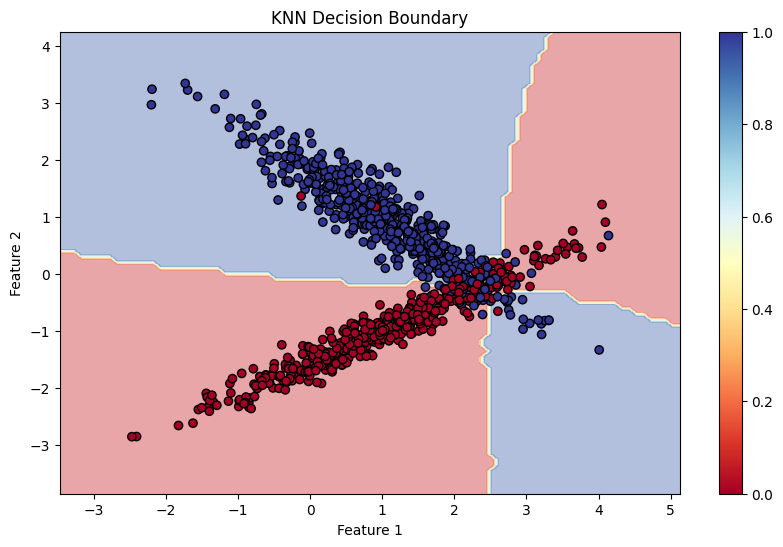


Plotting feature importance...


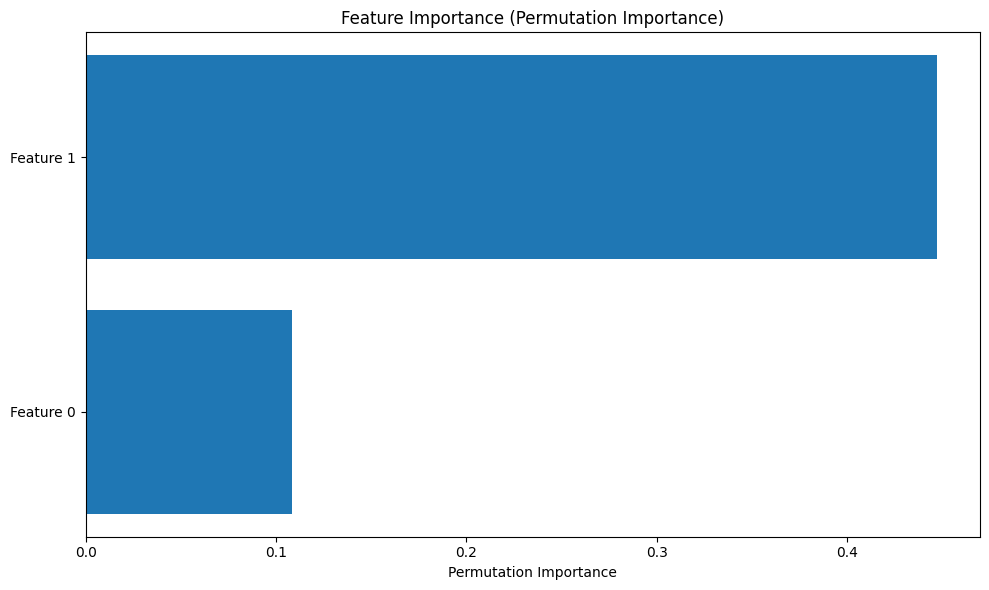


Analysis complete!


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance

def generate_dataset(n_samples=1000, n_features=2, n_classes=2):
    """
    Generate a custom dataset for classification.

    Parameters:
    -----------
    n_samples : int, optional (default=1000)
        The number of samples to generate.
    n_features : int, optional (default=2)
        The number of features to generate. Keep at 2 for easy visualization.
    n_classes : int, optional (default=2)
        The number of classes (or labels) to generate.

    Returns:
    --------
    X : array of shape (n_samples, n_features)
        The generated samples.
    y : array of shape (n_samples,)
        The integer labels for class membership of each sample.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def create_knn_pipeline():
    """
    Create a pipeline for KNN with standardization.

    This pipeline ensures that the data is standardized before
    being fed into the KNN model, which is crucial for KNN performance.

    Returns:
    --------
    sklearn.pipeline.Pipeline
        A scikit-learn pipeline with StandardScaler and KNeighborsClassifier.
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ])

def perform_grid_search(pipeline, X_train, y_train):
    """
    Perform grid search to find the best hyperparameters for KNN.

    Parameters:
    -----------
    pipeline : sklearn.pipeline.Pipeline
        The KNN pipeline.
    X_train : array-like of shape (n_samples, n_features)
        The training input samples.
    y_train : array-like of shape (n_samples,)
        The target values for training.

    Returns:
    --------
    sklearn.model_selection.GridSearchCV
        A fitted GridSearchCV object.
    """
    # Define the hyperparameter grid to search
    param_grid = {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
        'classifier__weights': ['uniform', 'distance'],  # Weight function used in prediction
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use
        'classifier__p': [1, 2]  # Power parameter for the Minkowski metric
    }

    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        n_jobs=-1,  # Use all available cores
        verbose=1
    )

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    return grid_search

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print classification metrics.

    Parameters:
    -----------
    model : estimator object
        The fitted model to evaluate.
    X_test : array-like of shape (n_samples, n_features)
        The testing input samples.
    y_test : array-like of shape (n_samples,)
        The target values for testing.
    """
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(X, y, model, ax=None):
    """
    Plot the decision boundary for a trained model.

    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The input samples (must be 2D for visualization).
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model with a predict method.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot. If None, a new figure and axes will be created.

    Returns:
    --------
    matplotlib.axes.Axes
        The axes containing the plot.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Plot the original data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('KNN Decision Boundary')

    plt.colorbar(scatter, ax=ax)

    return ax

def plot_feature_importance(model, X, y):
    """
    Plot feature importance using permutation importance.

    Parameters:
    -----------
    model : fitted estimator object
        The trained model.
    X : array-like of shape (n_samples, n_features)
        The input samples.
    y : array-like of shape (n_samples,)
        The target values.
    """
    # Calculate permutation importance
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

    # Sort features by importance
    feature_importance = perm_importance.importances_mean
    sorted_idx = feature_importance.argsort()

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
    plt.yticks(range(X.shape[1]), [f'Feature {i}' for i in sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title('Feature Importance (Permutation Importance)')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Generate custom dataset
    print("Generating dataset...")
    X, y = generate_dataset()

    # Split the data
    print("Splitting dataset into train and test sets...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the KNN pipeline
    pipeline = create_knn_pipeline()

    # Perform grid search
    print("Starting grid search...")
    grid_search = perform_grid_search(pipeline, X_train, y_train)

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the model
    print("\nEvaluating best model on test set:")
    evaluate_model(best_model, X_test, y_test)

    # Plot the decision boundary
    print("\nPlotting decision boundary...")
    plot_decision_boundary(X, y, best_model)
    plt.show()

    # Plot feature importance
    print("\nPlotting feature importance...")
    plot_feature_importance(best_model, X, y)

    print("\nAnalysis complete!")

# Note: This script will take some time to run due to the grid search.
# The output will show the progress of the grid search, the best parameters found,
# and the performance metrics of the best model on the test set.

# Gaussian Naive Bayes

Gaussian Naive Bayes is a variant of the Naive Bayes algorithm that assumes the features follow a Gaussian (normal) distribution. It's particularly suitable for continuous data and is implemented in scikit-learn as GaussianNB.

## How Gaussian Naive Bayes Works

1. The algorithm calculates the mean and standard deviation of each feature for each class.
2. For a new data point, it calculates the probability of the point belonging to each class using the Gaussian probability density function.
3. The class with the highest probability is assigned to the data point.

## Mathematical Formulation

For a feature vector X = (x₁, ..., xn), the probability of it belonging to class y is:

$$P(y|X) = \frac{P(X|y)P(y)}{P(X)}$$

Where P(X|y) is calculated as:

$$P(X|y) = \prod_{i=1}^n P(x_i|y)$$

And for Gaussian Naive Bayes:

$$P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}\right)$$

Where μy and σy² are the mean and variance of feature i for class y.

## Hyperparameters in Scikit-learn's GaussianNB

Scikit-learn's implementation of Gaussian Naive Bayes (GaussianNB) has one main hyperparameter:

1. **var_smoothing** (float, default=1e-9):
   - Purpose: Portion of the largest variance of all features that is added to variances for calculation stability.
   - Impact: Acts as a form of regularization to prevent division by zero and to handle features with zero variance.
   - Tuning: Typically, the default value works well, but you might adjust it if dealing with very small variances in your data.

## Attributes after Fitting

After fitting the model, GaussianNB provides several useful attributes:

- **classes_**: Array of class labels known to the classifier.
- **class_count_**: Number of training samples observed in each class.
- **class_prior_**: Probability of each class.
- **theta_**: Mean of each feature per class.
- **var_**: Variance of each feature per class.
- **n_features_in_**: Number of features seen during fit.
- **feature_names_in_**: Names of features seen during fit (if available).

## Pros and Cons of Gaussian Naive Bayes

### Pros:
1. Simple and easy to implement
2. Fast training and prediction
3. Works well with high-dimensional data
4. Performs well with small training sets
5. Naturally handles multi-class problems
6. Requires less training data compared to more complex models

### Cons:
1. Assumes strong independence between features, which is often unrealistic
2. Assumes Gaussian distribution of features, which may not always hold
3. Can be outperformed by more sophisticated models on large datasets
4. Sensitive to feature scaling

## When to Use Gaussian Naive Bayes

Gaussian Naive Bayes is particularly useful in the following scenarios:

1. When working with continuous data that approximately follows a Gaussian distribution
2. As a baseline model for classification tasks
3. In real-time prediction scenarios due to its speed
4. When dealing with high-dimensional data, especially when the number of features is larger than the number of training samples
5. In text classification tasks after applying tf-idf transformation


Gaussian Naive Bayes is a simple yet effective classifier for continuous data. While it makes strong assumptions about feature independence and distribution, it often performs surprisingly well in practice. Its simplicity, speed, and ability to handle high-dimensional data make it a valuable tool in a data scientist's toolkit, especially as a baseline model or in scenarios where computational resources are limited.

Generating dataset...
Splitting dataset into train and test sets...
Starting grid search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'classifier__var_smoothing': np.float64(1e-11)}
Best cross-validation score: 0.9012499999999999

Evaluating best model on test set:
Accuracy: 0.905

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       104
           1       0.93      0.86      0.90        96

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200


Confusion Matrix:
 [[98  6]
 [13 83]]

Plotting decision boundary...


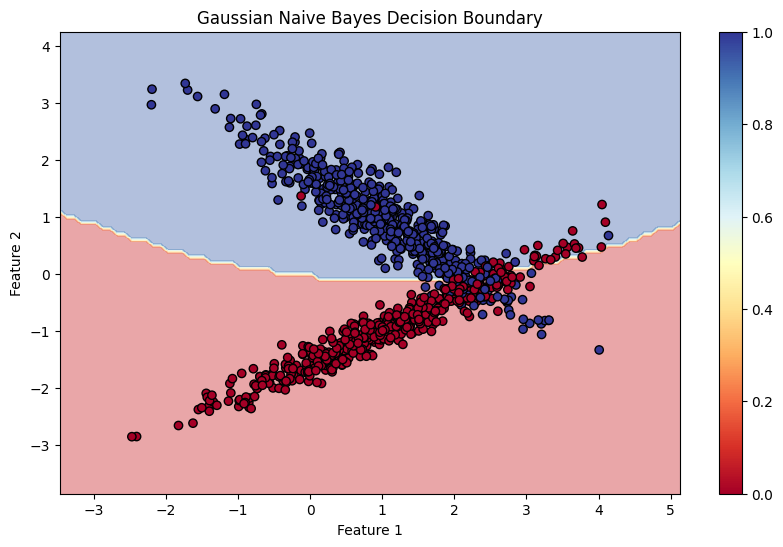


Plotting feature importance...


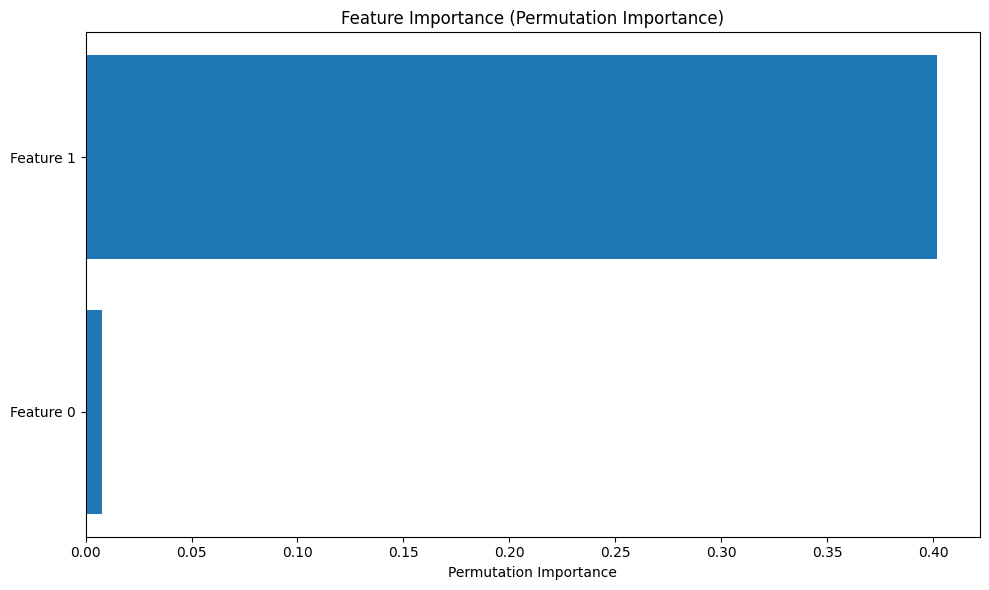


Analysis complete!


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

def generate_dataset(n_samples=1000, n_features=2, n_classes=2):
    """
    Generate a custom dataset for classification.

    Parameters:
    -----------
    n_samples : int, optional (default=1000)
        The number of samples to generate.
    n_features : int, optional (default=2)
        The number of features to generate. Keep at 2 for easy visualization.
    n_classes : int, optional (default=2)
        The number of classes (or labels) to generate.

    Returns:
    --------
    X : array of shape (n_samples, n_features)
        The generated samples.
    y : array of shape (n_samples,)
        The integer labels for class membership of each sample.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def create_gnb_pipeline():
    """
    Create a pipeline for Gaussian Naive Bayes with standardization.

    Returns:
    --------
    sklearn.pipeline.Pipeline
        A scikit-learn pipeline with StandardScaler and GaussianNB.
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ])

def perform_grid_search(pipeline, X_train, y_train):
    """
    Perform grid search to find the best hyperparameters for Gaussian Naive Bayes.

    Parameters:
    -----------
    pipeline : sklearn.pipeline.Pipeline
        The Gaussian Naive Bayes pipeline.
    X_train : array-like of shape (n_samples, n_features)
        The training input samples.
    y_train : array-like of shape (n_samples,)
        The target values for training.

    Returns:
    --------
    sklearn.model_selection.GridSearchCV
        A fitted GridSearchCV object.
    """
    # Define the hyperparameter grid to search
    param_grid = {
        'classifier__var_smoothing': np.logspace(-11, -6, 10)
    }

    # Create and fit GridSearchCV object
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        n_jobs=-1,  # Use all available cores
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    return grid_search

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print classification metrics.

    Parameters:
    -----------
    model : estimator object
        The fitted model to evaluate.
    X_test : array-like of shape (n_samples, n_features)
        The testing input samples.
    y_test : array-like of shape (n_samples,)
        The target values for testing.
    """
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

def plot_decision_boundary(X, y, model, ax=None):
    """
    Plot the decision boundary for a trained model.

    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The input samples (must be 2D for visualization).
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model with a predict method.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot. If None, a new figure and axes will be created.

    Returns:
    --------
    matplotlib.axes.Axes
        The axes containing the plot.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Plot the original data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Gaussian Naive Bayes Decision Boundary')

    plt.colorbar(scatter, ax=ax)

    return ax

def plot_feature_importance(model, X, y):
    """
    Plot feature importance using permutation importance.

    Parameters:
    -----------
    model : fitted estimator object
        The trained model.
    X : array-like of shape (n_samples, n_features)
        The input samples.
    y : array-like of shape (n_samples,)
        The target values.
    """
    # Calculate permutation importance
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

    # Sort features by importance
    feature_importance = perm_importance.importances_mean
    sorted_idx = feature_importance.argsort()

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
    plt.yticks(range(X.shape[1]), [f'Feature {i}' for i in sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title('Feature Importance (Permutation Importance)')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Generate custom dataset
    print("Generating dataset...")
    X, y = generate_dataset()

    # Split the data
    print("Splitting dataset into train and test sets...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the Gaussian Naive Bayes pipeline
    pipeline = create_gnb_pipeline()

    # Perform grid search
    print("Starting grid search...")
    grid_search = perform_grid_search(pipeline, X_train, y_train)

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the model
    print("\nEvaluating best model on test set:")
    evaluate_model(best_model, X_test, y_test)

    # Plot the decision boundary
    print("\nPlotting decision boundary...")
    plot_decision_boundary(X, y, best_model)
    plt.show()

    # Plot feature importance
    print("\nPlotting feature importance...")
    plot_feature_importance(best_model, X, y)

    print("\nAnalysis complete!")

# Note: This script will take some time to run due to the grid search.
# The output will show the progress of the grid search, the best parameters found,
# and the performance metrics of the best model on the test set.

# Machine Learning Model Comparison Exercise
---

In this exercise, you will compare the performance of multiple machine learning models using grid search for hyperparameter tuning. You'll work with pre-defined boilerplate functions and fill in the necessary code to complete the task.

## Objective

Your goal is to implement and compare the following models:

1. Logistic Regression
2. Support Vector Machine (SVM)
3. K-Nearest Neighbors (KNN)
4. Decision Tree
5. Random Forest
6. Gaussian Naive Bayes

## Tasks

1. **Data Preparation**
   - Use the provided function to generate a dataset.
   - Split the data into training and testing sets.

2. **Model Implementation**
   - For each model, create a pipeline that includes preprocessing (StandardScaler) and the classifier.
   - Define an appropriate parameter grid for each model.

3. **Grid Search**
   - Implement grid search with cross-validation for each model.
   - Use the provided boilerplate function and fill in the necessary code.

4. **Model Evaluation**
   - Use the best model from each grid search to make predictions on the test set.
   - Calculate and record the accuracy score and classification report for each model.

5. **Visualization**
   - Create a bar plot comparing the accuracy of all models.
   - For the best performing model, plot its decision boundary and feature importance.

6. **Analysis**
   - Write a brief analysis of the results, discussing which model performed best and why.
   - Consider the trade-offs between model performance and computational complexity.

## Boilerplate Functions

You will be provided with the following boilerplate functions:

- `generate_dataset()`: Creates a custom dataset for classification.
- `create_pipeline(classifier)`: Creates a pipeline with StandardScaler and the given classifier.
- `perform_grid_search(pipeline, param_grid, X_train, y_train)`: Performs grid search with cross-validation.
- `evaluate_model(model, X_test, y_test)`: Evaluates the model and prints classification metrics.
- `plot_model_comparison(model_scores)`: Creates a bar plot comparing model accuracies.
- `plot_decision_boundary(X, y, model)`: Plots the decision boundary for a given model.
- `plot_feature_importance(model, X, y)`: Plots feature importance for tree-based models.

## Your Task

Your main task is to fill in the code for:

1. Creating pipelines for each model.
2. Defining parameter grids for each model.
3. Performing grid search for each model.
4. Evaluating and comparing the models.
5. Visualizing the results.

## Expected Output

- Accuracy scores and classification reports for all models.
- A bar plot comparing the accuracy of all models.
- Decision boundary plot for the best performing model.
- Feature importance plot for tree-based models (if applicable).
- A brief written analysis of the results.

## Tips

- Start with a small parameter grid for each model to reduce computation time. You can expand it later if needed.
- Pay attention to the specific parameters each model uses.
- Consider the strengths and weaknesses of each model type when analyzing the results.
- Don't forget to use cross-validation to get a robust estimate of model performance.

Good luck, and happy modeling!

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

def generate_dataset(n_samples=1000, n_features=2, n_classes=2):
    """
    Generate a custom dataset for classification.
    
    Parameters:
    -----------
    n_samples : int, optional (default=1000)
        The number of samples to generate.
    n_features : int, optional (default=2)
        The number of features to generate. Keep at 2 for easy visualization.
    n_classes : int, optional (default=2)
        The number of classes (or labels) to generate.
    
    Returns:
    --------
    X : array of shape (n_samples, n_features)
        The generated samples.
    y : array of shape (n_samples,)
        The integer labels for class membership of each sample.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def create_pipeline(classifier):
    """
    Create a pipeline with StandardScaler and the given classifier.
    
    Parameters:
    -----------
    classifier : estimator object
        The classifier to be used in the pipeline.
    
    Returns:
    --------
    sklearn.pipeline.Pipeline
        A scikit-learn pipeline with StandardScaler and the classifier.
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

def perform_grid_search(pipeline, param_grid, X_train, y_train):
    """
    Perform grid search to find the best hyperparameters for the given pipeline.
    
    Parameters:
    -----------
    pipeline : sklearn.pipeline.Pipeline
        The pipeline to perform grid search on.
    param_grid : dict
        The hyperparameter grid to search.
    X_train : array-like of shape (n_samples, n_features)
        The training input samples.
    y_train : array-like of shape (n_samples,)
        The target values for training.
    
    Returns:
    --------
    sklearn.model_selection.GridSearchCV
        A fitted GridSearchCV object.
    """
    # TODO: Implement grid search using GridSearchCV
    # Use 5-fold cross-validation and all available CPU cores
    pass

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print classification metrics.
    
    Parameters:
    -----------
    model : estimator object
        The fitted model to evaluate.
    X_test : array-like of shape (n_samples, n_features)
        The testing input samples.
    y_test : array-like of shape (n_samples,)
        The target values for testing.
    
    Returns:
    --------
    float
        The accuracy score of the model on the test set.
    """
    # TODO: Implement model evaluation
    # Make predictions, calculate accuracy, and print classification report
    pass

def plot_model_comparison(model_scores):
    """
    Create a bar plot comparing the accuracy of all models.
    
    Parameters:
    -----------
    model_scores : dict
        A dictionary with model names as keys and their accuracy scores as values.
    """
    # TODO: Implement bar plot for model comparison
    pass

def plot_decision_boundary(X, y, model):
    """
    Plot the decision boundary for a trained model.
    
    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The input samples (must be 2D for visualization).
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model with a predict method.
    """
    # TODO: Implement decision boundary plotting
    pass

def plot_feature_importance(model, X, y):
    """
    Plot feature importance using permutation importance.
    
    Parameters:
    -----------
    model : fitted estimator object
        The trained model.
    X : array-like of shape (n_samples, n_features)
        The input samples.
    y : array-like of shape (n_samples,)
        The target values.
    """
    # TODO: Implement feature importance plotting using permutation_importance
    pass

if __name__ == "__main__":
    # Generate dataset
    X, y = generate_dataset()
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Dictionary to store model scores
    model_scores = {}
    
    # List of classifiers to compare
    classifiers = [
        ('Logistic Regression', LogisticRegression()),
        ('SVM', SVC()),
        ('KNN', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gaussian Naive Bayes', GaussianNB())
    ]
    
    # Iterate through classifiers
    for name, classifier in classifiers:
        print(f"\nTraining {name}...")
        
        # Create pipeline
        pipeline = create_pipeline(classifier)
        
        # TODO: Define parameter grid for each classifier
        param_grid = {
            # Add appropriate parameters for each classifier
        }
        
        # Perform grid search
        grid_search = perform_grid_search(pipeline, param_grid, X_train, y_train)
        
        # Get best model
        best_model = grid_search.best_estimator_
        
        # Evaluate model
        accuracy = evaluate_model(best_model, X_test, y_test)
        
        # Store accuracy score
        model_scores[name] = accuracy
    
    # Plot model comparison
    plot_model_comparison(model_scores)
    
    # Find best performing model
    best_model_name = max(model_scores, key=model_scores.get)
    best_model = next(clf for name, clf in classifiers if name == best_model_name)
    
    print(f"\nBest performing model: {best_model_name}")
    
    # Plot decision boundary for best model
    plot_decision_boundary(X, y, best_model)
    
    # Plot feature importance for best model (if applicable)
    if hasattr(best_model, 'feature_importances_') or isinstance(best_model, (RandomForestClassifier, DecisionTreeClassifier)):
        plot_feature_importance(best_model, X, y)
    
    print("\nAnalysis complete!")

# Note: This script provides a framework for comparing multiple machine learning models.
# You need to fill in the TODO sections to complete the implementation.
# Make sure to run the script with appropriate data and analyze the results.


Training Logistic Regression...


AttributeError: 'NoneType' object has no attribute 'best_estimator_'

### Solution



Training Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for Logistic Regression:
{'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200


Training SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for SVM:
{'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       104
           1       0.97      0.91      0.94        96

    accuracy           

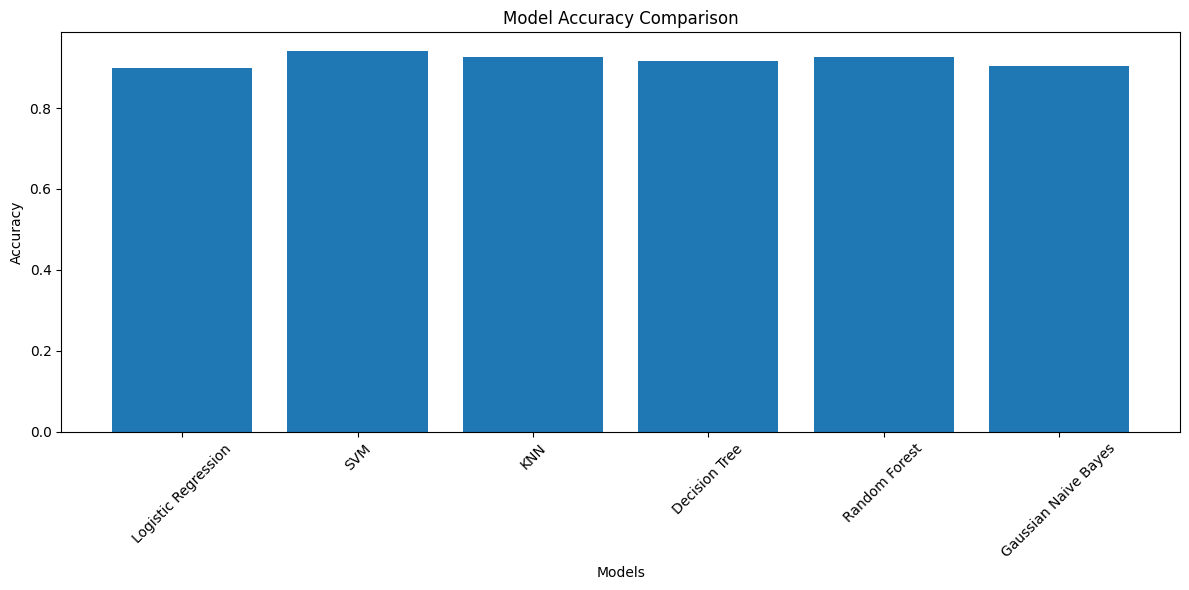


Best performing model: SVM

Comparing all best models:

Logistic Regression:
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200


SVM:
Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       104
           1       0.97      0.91      0.94        96

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200


KNN:
Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       104
           1       0.92    

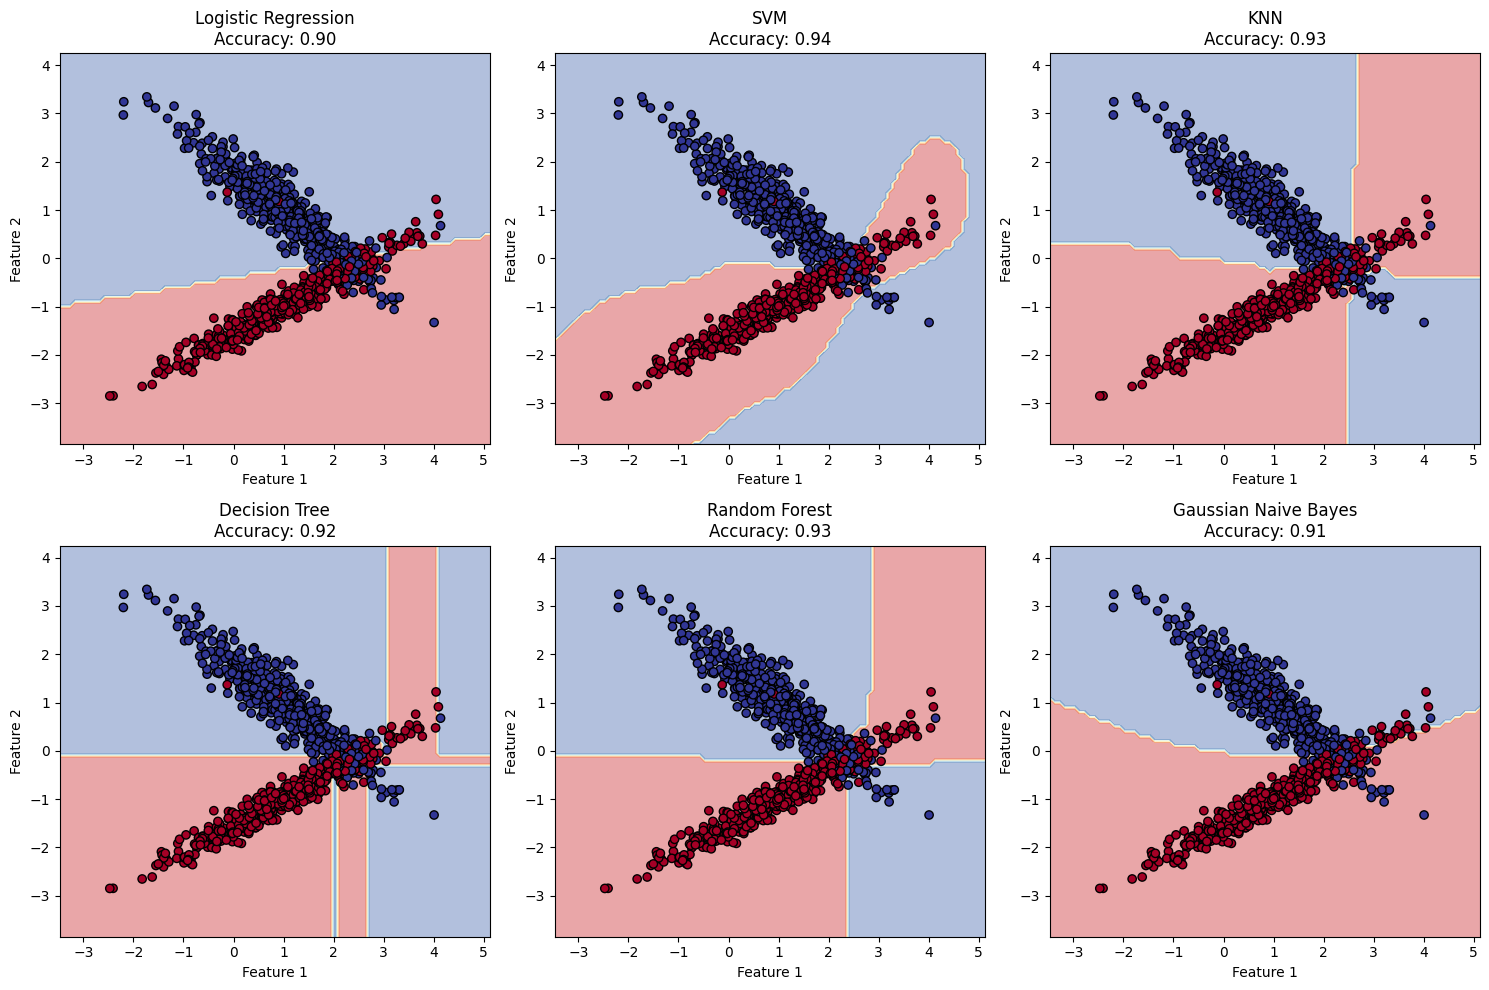


Analysis complete!


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance

def generate_dataset(n_samples=1000, n_features=2, n_classes=2):
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def create_pipeline(classifier):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

def perform_grid_search(pipeline, param_grid, X_train, y_train):
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    return grid_search

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    return accuracy

def plot_model_comparison(model_scores):
    plt.figure(figsize=(12, 6))
    plt.bar(model_scores.keys(), model_scores.values())
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_decision_boundary(X, y, model, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    if title:
        ax.set_title(title)
    
    return ax

def plot_feature_importance(model, X, y):
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    feature_importance = perm_importance.importances_mean
    sorted_idx = feature_importance.argsort()
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
    plt.yticks(range(X.shape[1]), [f'Feature {i}' for i in sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Generate dataset
    X, y = generate_dataset()
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Dictionary to store model scores and best estimators
    model_scores = {}
    best_models = {}
    
    # List of classifiers to compare
    classifiers = [
        ('Logistic Regression', LogisticRegression()),
        ('SVM', SVC()),
        ('KNN', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gaussian Naive Bayes', GaussianNB())
    ]
    
    # Iterate through classifiers
    for name, classifier in classifiers:
        print(f"\nTraining {name}...")
        
        # Create pipeline
        pipeline = create_pipeline(classifier)
        
        # Define parameter grid for each classifier
        if name == 'Logistic Regression':
            param_grid = {
                'classifier__C': [0.1, 1, 10],
                'classifier__penalty': ['l1', 'l2'],
                'classifier__solver': ['liblinear', 'saga']
            }
        elif name == 'SVM':
            param_grid = {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['rbf', 'linear'],
                'classifier__gamma': ['scale', 'auto']
            }
        elif name == 'KNN':
            param_grid = {
                'classifier__n_neighbors': [3, 5, 7],
                'classifier__weights': ['uniform', 'distance'],
                'classifier__metric': ['euclidean', 'manhattan']
            }
        elif name == 'Decision Tree':
            param_grid = {
                'classifier__max_depth': [None, 10, 20],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__criterion': ['gini', 'entropy']
            }
        elif name == 'Random Forest':
            param_grid = {
                'classifier__n_estimators': [100, 200],
                'classifier__max_depth': [None, 10, 20],
                'classifier__min_samples_split': [2, 5, 10]
            }
        else:  # Gaussian Naive Bayes
            param_grid = {
                'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
            }
        
        # Perform grid search
        grid_search = perform_grid_search(pipeline, param_grid, X_train, y_train)
        
        # Get best model
        best_model = grid_search.best_estimator_
        
        # Evaluate model
        print(f"\nBest parameters for {name}:")
        print(grid_search.best_params_)
        accuracy = evaluate_model(best_model, X_test, y_test)
        
        # Store accuracy score and best model
        model_scores[name] = accuracy
        best_models[name] = best_model
    
    # Plot model comparison
    plot_model_comparison(model_scores)
    
    # Find best performing model
    best_model_name = max(model_scores, key=model_scores.get)
    best_model = best_models[best_model_name]
    
    print(f"\nBest performing model: {best_model_name}")
    
    # Plot feature importance for best model (if applicable)
    if hasattr(best_model[-1], 'feature_importances_') or isinstance(best_model[-1], (RandomForestClassifier, DecisionTreeClassifier)):
        plot_feature_importance(best_model, X, y)
    
    # Compare all best models
    print("\nComparing all best models:")
    n_models = len(best_models)
    n_cols = 3
    n_rows = (n_models - 1) // n_cols + 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    
    for i, (name, model) in enumerate(best_models.items()):
        print(f"\n{name}:")
        accuracy = evaluate_model(model, X_test, y_test)
        plot_decision_boundary(X, y, model, ax=axes[i], title=f"{name}\nAccuracy: {accuracy:.2f}")
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    print("\nAnalysis complete!")